In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df= pd.read_csv('Myntra Fasion Clothing.csv')
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_27376\1286122452.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('Myntra Fasion Clothing.csv')


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


#### category , individual category ,category by gender,description -- categorical col.
#### DiscountOffer-> convert this into numerical cols

In [51]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

##### DiscountPrice (in Rs) has 36 % missing data
##### Ratings and reviews  has 63 % missing data 
##### DiscountOffer  has  14 % missing data

In [52]:
# convert it data type into string 
df['DiscountOffer']=df['DiscountOffer'].astype(str)

In [53]:
# this function can extract only the numerical values from discountoffer column
import re 
def extract_numeric(discount):
    num=re.findall(r'\d+',discount)
    return int(num[0]) if num else None
df['DiscountOffer']=df['DiscountOffer'].apply(extract_numeric)

In [54]:
# Discountoffer we fill this by mode 
mode_discount = df['DiscountOffer'].mode()[0]

In [55]:
df['DiscountOffer'].fillna(mode_discount, inplace= True )

In [58]:
df.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer                 0
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

###### Discounted price formula
Discounted Price = Original Price - (Discount Percentage / 100) * Original Price

In [59]:
# Change columns name for easye
df=df.rename(columns={'DiscountPrice (in Rs)':"Discountprice",
                     'OriginalPrice (in Rs)':'orginalprice'})

In [61]:
df['Discountprice']=df['orginalprice']-(df['DiscountOffer']/100)*df['orginalprice']

the distribution looks roughly normal with a slight skew to the left. The missing value is relatively close to the mean of the distribution, so using the mean to fill in the missing value may be a reasonable choice.

C:\Users\dell\AppData\Local\Temp\ipykernel_27376\1774655948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ratings'],kde=True)


<Axes: xlabel='Ratings', ylabel='Density'>

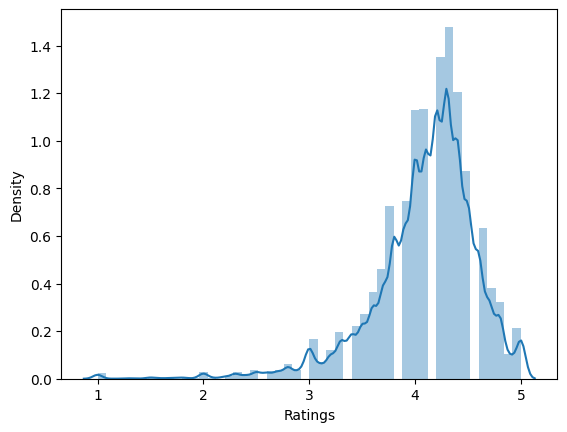

In [68]:
sns.distplot(df['Ratings'],kde=True)

In [71]:
mean=df['Ratings'].mean()
df['Ratings'].fillna(mean,inplace=True)

If the distribution is highly right-skewed, it is generally recommended to fill missing values with the median instead of the mean. This is because the mean is sensitive to extreme values in the right tail, which can lead to an inflated estimate of the central tendency. The median, on the other hand, is less sensitive to extreme values and provides a more robust estimate of the central tendency.

C:\Users\dell\AppData\Local\Temp\ipykernel_27376\1338617522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Reviews'],kde=True)


<Axes: xlabel='Reviews', ylabel='Density'>

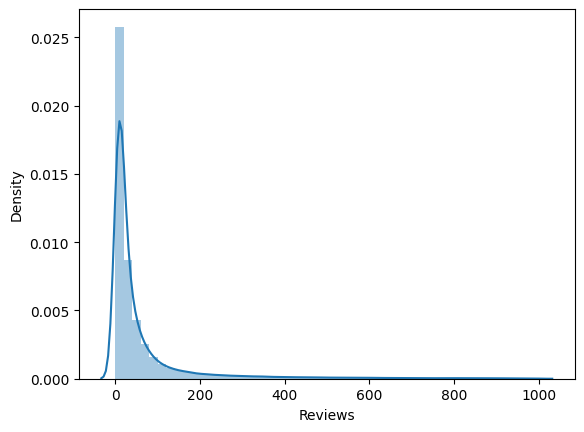

In [69]:
sns.distplot(df['Reviews'],kde=True)

In [74]:
median=df['Reviews'].median()
df['Reviews'].fillna(median,inplace=True)

In [75]:
df.isnull().sum()

URL                    0
Product_id             0
BrandName              0
Category               0
Individual_category    0
category_by_Gender     0
Description            0
Discountprice          0
orginalprice           0
DiscountOffer          0
SizeOption             0
Ratings                0
Reviews                0
dtype: int64

In [76]:
df.describe()

,Product_id,Discountprice,orginalprice,DiscountOffer,Ratings,Reviews
count,5.265640e+05,5.265640e+05,526564.000000,526564.000000,526564.000000,526564.000000
mean,1.506939e+07,-1.076387e+03,2414.068615,91.300228,4.094892,33.907620
std,3.225710e+06,6.377084e+04,1916.962914,382.268440,0.297158,78.496441
min,2.739900e+04,-1.615545e+07,99.000000,1.000000,1.000000,0.000000
25%,1.388053e+07,5.985000e+02,1299.000000,40.000000,4.094892,18.000000
50%,1.597106e+07,8.920600e+02,1999.000000,50.000000,4.094892,18.000000
75%,1.734741e+07,1.373900e+03,2899.000000,62.000000,4.094892,18.000000
max,1.846435e+07,4.500000e+04,90000.000000,36001.000000,5.000000,999.000000


## Univariate Analysis
###### Analysis of Brand Name

In [79]:
print('{} unique brand are in the dataset '.format(df['BrandName'].nunique()))

2088 unique brand are in the dataset 


<Axes: >

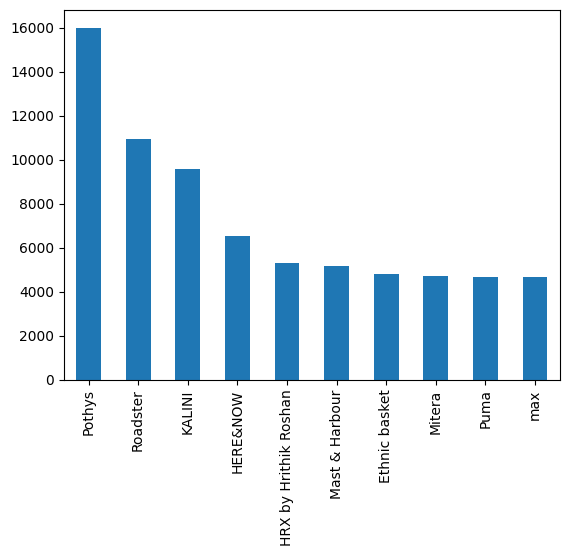

In [84]:
df['BrandName'].value_counts().head(10).plot(kind='bar')

In [85]:
# least top 10 brand
df['BrandName'].value_counts().tail(10)

ELABORADO                        1
NABIA                            1
neckbook                         1
Powerpuff Girls by Dressberry    1
IRIDAA JAIPUR                    1
PIVOTO                           1
PEONY SMART WORLD                1
OFFIRA TEX WORLD                 1
Sztori Garfield                  1
Geonaute By Decathlon            1
Name: BrandName, dtype: int64

##### Most Expensive Product 

In [109]:
df[df['orginalprice']==df['orginalprice'].max()]

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,Discountprice,orginalprice,DiscountOffer,SizeOption,Ratings,Reviews
402189,https://www.myntra.com/lehenga-choli/masaba/ma...,16872366,Masaba,Indian Wear,lehenga-choli,Women,masaba purple pink embellished ready to wear ...,45000.0,90000.0,50.0,"XS, S, M, L, XL",4.094892,18.0


##### Top 10 most Expensive Brand

In [113]:
df.groupby('BrandName').s()['orginalprice'].sort_values(ascending=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_27376\3612110839.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('BrandName').mean()['orginalprice'].sort_values(ascending=False)


BrandName
Teakwood Leathers      20832.333333
echt                   18999.000000
WHITE FIRE             17103.896104
Masaba                 16952.107143
DRESSTIVE              16557.526882
                           ...     
LAVOS                    382.200000
DIXCY SCOTT MAXIMUS      372.584615
Macrowoman W-Series      325.000000
Softline Butterfly       306.000000
Zalza                    299.000000
Name: orginalprice, Length: 2088, dtype: float64

##### Analyzing category 

In [86]:

print("{} unique Categories are there in the dataset".format(df['Category'].nunique()))

8 unique Categories are there in the dataset


<Axes: >

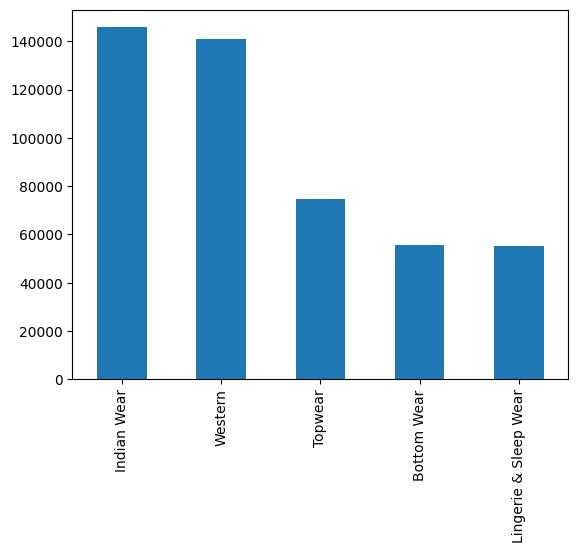

In [87]:
df['Category'].value_counts().head().plot(kind='bar')

#### Analysing Individual_category column

In [89]:
print('{} unique Categories are there in the dataset'.format(df['Individual_category'].nunique()))

92 unique Categories are there in the dataset


<Axes: >

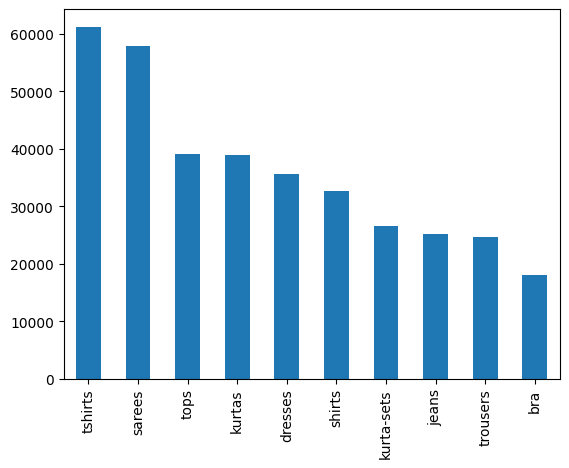

In [90]:
df['Individual_category'].value_counts().head(10).plot(kind='bar')

###### Top Brand Under T shirt Category

([<matplotlib.patches.Wedge at 0x205033aaf50>,
 [Text(0.8003843488617882, 0.7545759697320684, 'Roadster'),
  Text(-0.3552510697489421, 1.0410555592485122, 'Puma'),
  Text(-0.976573661012807, 0.5062646389153043, 'HRX by Hrithik Roshan'),
  Text(-1.0666820388024763, -0.2686809038547269, 'Mast & Harbour'),
  Text(-0.7217551139667746, -0.830102135560925, 'Friskers'),
  Text(-0.25677769269231476, -1.0696098431370251, 'QUANCIOUS'),
  Text(0.21328045138695842, -1.0791253166598287, 'Kalt'),
  Text(0.6222872957082597, -0.9070603737349024, 'Huetrap'),
  Text(0.9202921879981075, -0.602546503358584, 'HERE&NOW'),
  Text(1.0795596102622105, -0.21107119152197046, 'max')],
 [Text(0.43657328119733896, 0.4115868925811282, '24.06%'),
  Text(-0.1937733107721502, 0.5678484868628247, '12.34%'),
  Text(-0.5326765423706219, 0.27614434849925684, '11.97%'),
  Text(-0.5818265666195324, -0.1465532202843965, '11.11%'),
  Text(-0.3936846076182407, -0.4527829830332318, '8.25%'),
  Text(-0.1400605596503535, -0.583423

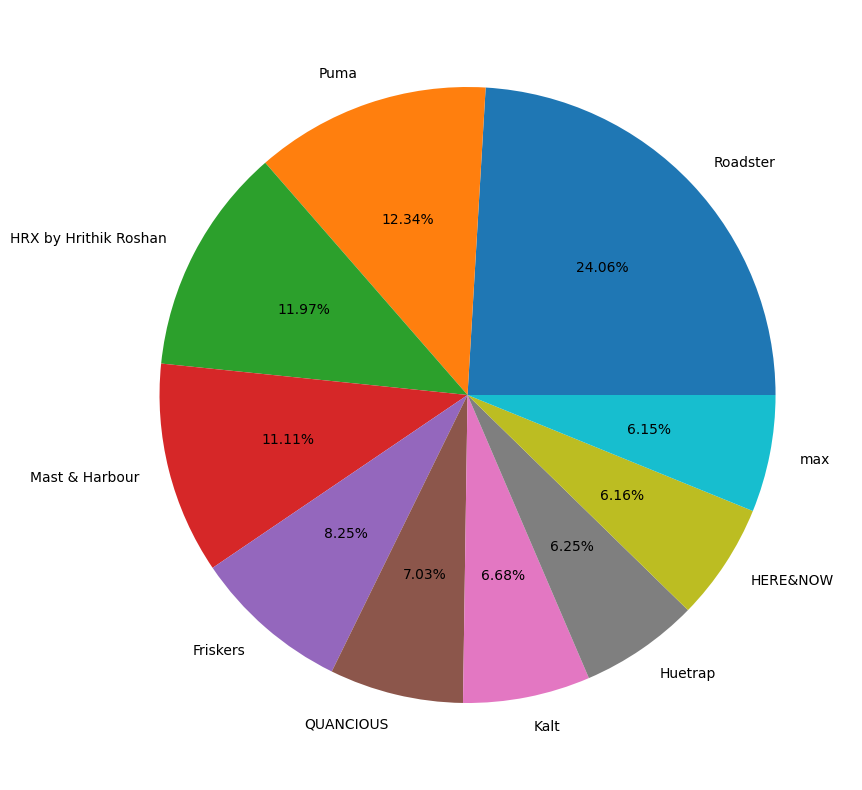

In [105]:
x=df[df['Individual_category']=='tshirts']
plt.figure(figsize=(10,10))
t=x['BrandName'].value_counts().head(10).values
r=x['BrandName'].value_counts().head(10).index
plt.pie(t,labels=r,autopct='%1.2f%%')

###### Top Brand Under sareees  Category

([<matplotlib.patches.Wedge at 0x20502fcac80>,
 [Text(0.3021806408961634, 1.0576799422640026, 'Pothys'),
  Text(-1.09957257210692, -0.030662006949520693, 'KALINI'),
  Text(-0.6165412990628012, -0.9109757551932728, 'Mitera'),
  Text(-0.06319665238376726, -1.0981831282292973, 'Florence'),
  Text(0.30826425948430614, -1.0559228884367422, 'SAADHVI'),
  Text(0.6114375215156086, -0.9144091848198211, 'Unnati Silks'),
  Text(0.8218512096876089, -0.7311365051308913, 'Charukriti'),
  Text(0.962203005824071, -0.5330716420736737, 'Saree mall'),
  Text(1.0508707461144033, -0.32507026157579716, 'Anouk'),
  Text(1.0945766639141994, -0.10909595232849724, 'VASTRANAND')],
 [Text(0.16482580412518003, 0.5769163321440014, '41.14%'),
  Text(-0.5997668575128654, -0.016724731063374923, '18.60%'),
  Text(-0.3362952540342552, -0.4968958664690578, '11.57%'),
  Text(-0.03447090130023669, -0.5990089790341622, '5.54%'),
  Text(0.16814414153689422, -0.5759579391473139, '5.33%'),
  Text(0.33351137537215014, -0.498768

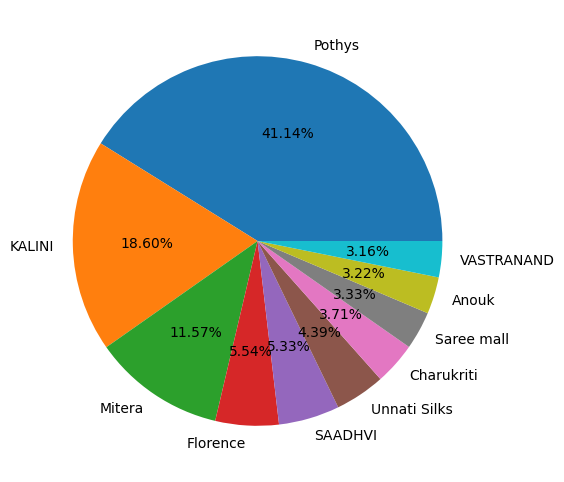

In [106]:
x=df[df['Individual_category']=='sarees']
plt.figure(figsize=(6,6))
t=x['BrandName'].value_counts().head(10).values
r=x['BrandName'].value_counts().head(10).index
plt.pie(t,labels=r,autopct='%1.2f%%')

##### Most Selling Category in Women

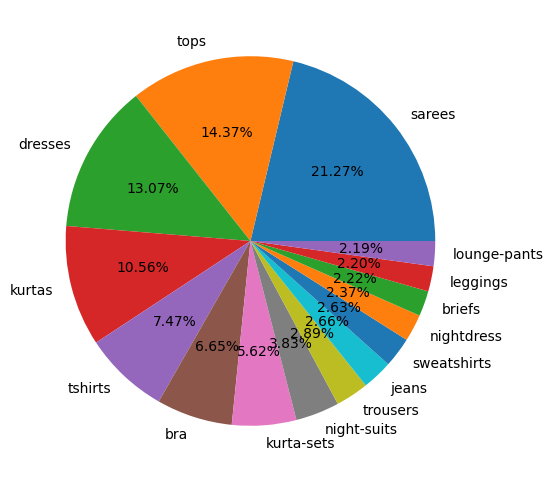

In [108]:
K = df[df['category_by_Gender'] == 'Women']
S = K['Individual_category'].value_counts().values
V = K['Individual_category'].value_counts().index

plt.figure(figsize = (6,6))
plt.pie(S[:15],labels=V[:15],autopct='%1.2f%%')
plt.show()

#### Analysing Gender columns

<Axes: ylabel='category_by_Gender'>

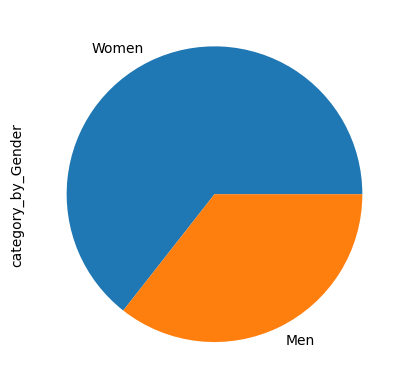

In [91]:
df['category_by_Gender'].value_counts().plot(kind='pie')


###### Brand name with orignal price

<Axes: >

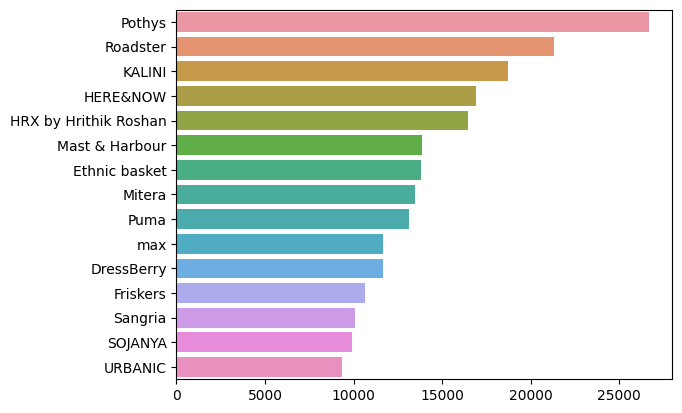

In [100]:
sns.barplot(x = df["orginalprice"].value_counts().head(15).values,# it return values
           y = df['BrandName'].value_counts().head(15).index) # it return name 

In [101]:
df1=df[df['BrandName']=='Pothys']

([<matplotlib.patches.Wedge at 0x205033f7610>,
 [Text(-1.0982427979589047, 0.06215107988922289, 'sarees'),
  Text(1.097536798707716, -0.07357292628690709, 'lehenga-choli'),
  Text(1.0999404731069835, -0.011443584280512972, 'dress-material')],
 [Text(-0.5990415261594025, 0.033900589030485206, '98.20%'),
  Text(0.5986564356587541, -0.04013068706558568, '1.47%'),
  Text(0.5999675307856274, -0.006241955062097984, '0.33%')])

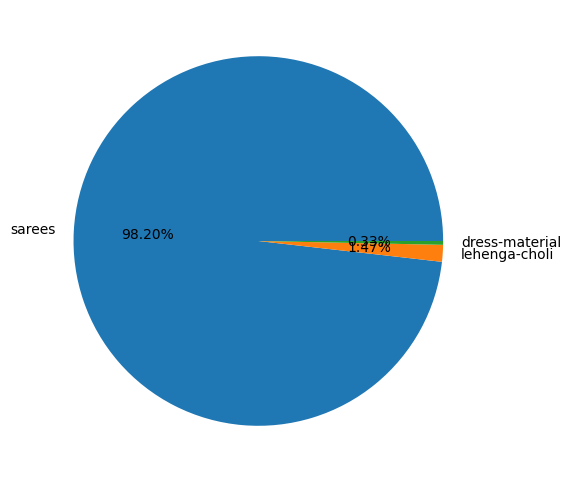

In [103]:
plt.figure(figsize = (6,6))

x = df1['Individual_category'].value_counts().head(10).values
y = df1['Individual_category'].value_counts().head(10).index

plt.pie(x, labels = y, autopct = '%1.2f%%')